# Practica Final: Estadistica Computacional

Autores: 
* Victor Ovejero 
* Luis Bueno 
* Yago Tobio 
* Jesus Lopez

El Sistema de Vigilancia de Factores de Riesgo Conductuales (BRFSS) es un proyecto colaborativo entre todos los estados de los Estados Unidos y los territorios participantes, coordinado por los Centros para el Control y la Prevención de Enfermedades (CDC). 

Este sistema, iniciado en 1984, recopila datos sobre factores de riesgo conductuales de la población adulta no institucionalizada. Su objetivo es proporcionar información uniforme y específica del estado sobre prácticas de salud preventiva y comportamientos de riesgo relacionados con enfermedades crónicas, lesiones y enfermedades prevenibles. 
  
**En este proyecto, analizaremos los datos recopilados por el BRFSS en 2013, que incluyen una amplia gama de temas como el uso del tabaco, el estado de salud, la actividad física y el consumo de alcohol, entre otros.**

----

### Indice:

+ [Dataset pre-processing](#section1)
+ [EDA](#section2)
+ [Stratified Sampling - Using KMeans](#section3)
+ [Results](#section4)
+ [Answers to Questions](#section5)

### Librerías e importación del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import asyncio
import time
import statsmodels.api as sm
import matplotlib
from matplotlib.cm import get_cmap

from scipy.stats import spearmanr, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
#df = pd.read_csv(r"C:\Users\lbarc\OneDrive - Universidad Pontificia Comillas\ICAI 11\Estadística computacional\ITSC_final_project\brfss2013.csv", encoding='cp1252')
df = pd.read_csv(r"brfss2013.csv", encoding='cp1252')

/var/folders/hs/d248yjt91hj682bsqhd1bv0m0000gn/T/ipykernel_29200/2517956842.py:2: DtypeWarning: Columns (11,14,50,53,102,103,104,105,108,111,112,113,118,119,120,121,122,123,125,126,127,130,132,134,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,216,226,227,228,229,230,312) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"brfss2013.csv", encoding='cp1252')


----
# Dataset pre-processing <a id='section1'></a>

In [3]:
df.shape

(491775, 330)

In [4]:
df.head()

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
0,Alabama,January,1092013.0,January,9.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,60.0
1,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,50.0
2,Alabama,January,1192013.0,January,19.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Told have arthritis and have limited usual act...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,Yes,55.0
3,Alabama,January,1112013.0,January,11.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NaN,NaN,No,64.0
4,Alabama,February,2062013.0,February,6.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66.0


In [5]:
df.describe()

,idate,iday,iyear,seqno,X_psu,numadult,nummen,numwomen,physhlth,menthlth,...,X_minac11,X_minac21,strfreq_,pamiss1_,pamin11_,pamin21_,pa1min_,pavig11_,pavig21_,X_age80
count,4.917730e+05,491772.000000,491770.000000,4.917720e+05,4.917730e+05,360124.000000,360125.000000,360125.000000,480818.000000,483148.000000,...,321736.000000,317119.000000,451951.000000,457743.000000,305512.000000,298023.000000,323814.000000,310354.000000,301810.000000,491764.000000
mean,6.672253e+06,13.749671,2013.011554,2.012998e+09,2.012994e+09,1.809529,0.813834,0.995599,4.352809,3.382734,...,227.785060,124.862805,1150.824820,0.128122,307.277213,163.206008,440.105045,79.485942,44.639170,54.773696
std,3.412168e+06,8.253897,0.106868,4.059552e+06,4.971904e+06,0.794296,0.620336,0.518258,8.854730,10.540449,...,383.047689,327.442243,2184.024274,8.721739,554.681322,448.991719,728.615228,246.043564,188.929618,17.031970
min,1.000000e+00,1.000000,2013.000000,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.022013e+06,7.000000,2013.000000,2.013002e+09,2.013002e+09,1.000000,0.000000,1.000000,0.000000,0.000000,...,70.000000,0.000000,0.000000,0.000000,84.000000,0.000000,109.000000,0.000000,0.000000,42.000000
50%,7.022013e+06,13.000000,2013.000000,2.013005e+09,2.013005e+09,2.000000,1.000000,1.000000,0.000000,0.000000,...,140.000000,30.000000,0.000000,0.000000,180.000000,30.000000,240.000000,0.000000,0.000000,57.000000
75%,1.001201e+07,20.000000,2013.000000,2.013008e+09,2.013008e+09,2.000000,1.000000,1.000000,3.000000,2.000000,...,245.000000,120.000000,2000.000000,0.000000,360.000000,175.000000,495.000000,70.000000,0.000000,68.000000
max,1.231201e+07,31.000000,2014.000000,2.013034e+09,2.013034e+09,45.000000,40.000000,16.000000,60.000000,5000.000000,...,44925.000000,40500.000000,99000.000000,5897.000000,81000.000000,81000.000000,81238.000000,40500.000000,40500.000000,80.000000


The US-RFS dataset is split into multiple sections: 
* Record Identification 
* Health Status 
* Healthy Days 
* Health Care Access
* Sleep 
* Hypertension 
* Cholesterol 
* Chronic Health Conditions 
* Demographics
* Alcohol Consumption 
* Fruits and vegetables 
* Exercise
* Arthritis Burden 
* Immunization 
* HIV/AIDS

among other optional modules.

This is why we believe that Stratified Sampling is the most relevant method to sample the population. Dividing them into homogenous strata. This way we can ensure that each subgroup of columns is representative of the population as a whoel. 

Our chosen variables are: 
* State
* General Health 
* Physical Health (Number of days physical health not good)
* Mental Health (Number of days mental health not good)
* Medcost (Could not see doctor because of cost)
* How much time they sleep
* Whether they ever had high blood pressure 
* Education Level 
* Blood choloresterol 
* Whether they've ever been diagnosed a heart attack 
* If they've ever had asthma, diabetes
* Whether they are a veteran
* Marital status
* Number of children in house hold 
* Employment status and income level 
* Weight, height, sex
* pregnancy status
* Internet usage in the past 30 days 
* Blind or difficulty seeing
* Walking difficulty
* Smoked at least 100 cigarrettes or if they've drunk in the last 30 days

In [6]:
# Define the columns to be used for stratified sampling
# This is based on importance of the columns in order to maintain a wide demographic across the sample
columns_of_interest = [
    'X_state', 'genhlth', 'physhlth', 'menthlth', 'hlthpln1', 'medcost', 'sleptim1',
    'bphigh4', 'bloodcho', 'cvdinfr4', 'asthma3', 'diabete3', 'veteran3', 'marital',
    'children', 'educa', 'employ1', 'income2', 'weight2', 'height3', 'sex',
    'pregnant', 'internet', 'blind', 'diffwalk', 'smoke100', 'drnkany5'
]

We must verify which columns are of type object, analyse their content using the report and then modify them to their appropriate data-type in order to get rid of any possible irrelevant NA's.

In [7]:
data_types = df[columns_of_interest].dtypes
print(data_types)

X_state      object
genhlth      object
physhlth    float64
menthlth    float64
hlthpln1     object
medcost      object
sleptim1    float64
bphigh4      object
bloodcho     object
cvdinfr4     object
asthma3      object
diabete3     object
veteran3     object
marital      object
children    float64
educa        object
employ1      object
income2      object
weight2      object
height3     float64
sex          object
pregnant     object
internet     object
blind        object
diffwalk     object
smoke100     object
drnkany5     object
dtype: object


In [8]:
df[columns_of_interest].head()

,X_state,genhlth,physhlth,menthlth,hlthpln1,medcost,sleptim1,bphigh4,bloodcho,cvdinfr4,...,income2,weight2,height3,sex,pregnant,internet,blind,diffwalk,smoke100,drnkany5
0,Alabama,Fair,30.0,29.0,Yes,No,NaN,Yes,Yes,No,...,"Less than $75,000",250.0,507.0,Female,NaN,Yes,No,Yes,Yes,No
1,Alabama,Good,0.0,0.0,Yes,No,6.0,No,Yes,No,...,"$75,000 or more",127.0,510.0,Female,NaN,Yes,No,No,No,Yes
2,Alabama,Good,3.0,2.0,Yes,No,9.0,No,Yes,No,...,"$75,000 or more",160.0,504.0,Female,NaN,Yes,No,Yes,Yes,No
3,Alabama,Very good,2.0,0.0,Yes,No,8.0,No,Yes,No,...,"Less than $75,000",128.0,504.0,Female,NaN,Yes,No,No,No,No
4,Alabama,Good,10.0,2.0,Yes,No,6.0,Yes,Yes,No,...,"Less than $50,000",265.0,600.0,Male,NaN,Yes,No,No,Yes,No


Weight is of type Object, and needs to be float, we convert to float to get rid of NAs and treat it as such throughout the study.

In [9]:
df['weight2'].dtype

dtype('O')

In [10]:
df = df[df['weight2'] != ".b"].copy() # Get rid of value that is not numeric
df['weight2'] = df['weight2'].astype(float).copy() # Transform to float

print("The type now is:", df["weight2"].dtype)

The type now is: float64


Technique to handle data sparsity - Fill in the NA's with the average of the each numerical column

In [11]:
# Check for NAs
print("Total NAs before filling numerical NAs: ",df.isna().sum().sum())

# There are many NAs, I will fill the NAs of numerical columns with the average of the column
# Determine numerical columns
numerical_columns = df.select_dtypes(include=['number','float','int']).columns

# Fill NaNs with the mean of each numerical column
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())

# Check for NAs
print("Total NAs after filling numerical NAs: ",df.isna().sum().sum())

Total NAs before filling numerical NAs:  69865840
Total NAs after filling numerical NAs:  50842278


In [12]:
# Determine categorical columns
categorical_columns = df.select_dtypes(exclude=['number','float','int']).columns

# Fill NaNs with 'unknown' for each categorical column
for column in categorical_columns:
    df[column] = df[column].fillna('unknown')

# Check for NAs
print("Total NAs after filling categorical NAs with unknown: ",df.isna().sum().sum())

Total NAs after filling categorical NAs with unknown:  0


We want to get rid of all the people that did not complete their interview, as it is probably not good quality data, or important information may be missing.

So we're going to remove all values for those who did not complete the interview

In [13]:
df['dispcode'].unique()

array(['Completed interview', 'Partially completed interview', 'unknown'],
      dtype=object)

In [14]:
print("Number of rows before getting rid of incompleted interviews: ", df.shape)
df = df[df['dispcode'] == "Completed interview"]
print("Number of rows after getting rid of incompleted interviews: ", df.shape)

Number of rows before getting rid of incompleted interviews:  (491774, 330)
Number of rows after getting rid of incompleted interviews:  (433221, 330)


### Replace outliers with mean values, as there are inputs that do not make sense and are a result of bad inputs, such as 4000 hours of daily sleep.

In [15]:
# Getting rid of outliers in Numerical Columns and inserting the mean value
def replace_outliers_with_mean(df, column_name, z_threshold=3):
    """
    Replace outliers in a column of a DataFrame with the mean of the column.

    Args:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to replace outliers in.
    - z_threshold (float): The Z-score threshold to identify outliers. Default is 3.

    Returns:
    - DataFrame: The DataFrame with outliers replaced with the mean of the column.
    """
    # Calculate Z-score for the column
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

    # Replace outliers with mean of the column
    df.loc[z_scores > z_threshold, column_name] = df[column_name].mean()

    return df


Before replacing outliers, there are numerical values that are unreasonably large, probably from bad or wrong responses, such as 4000 hours of sleep daily.

In [16]:
df_clean = df.copy()

for col in columns_of_interest:
    if col in numerical_columns:
      df_clean = replace_outliers_with_mean(df, col).copy()

We have filled in NAs as there were nearly 70 million values with NaNs out of 160 million values in total, rather than getting rid of those records which may have left us with not much data.

Now, we start exploring the data through initial EDA of categorical and numerical columns

---

# EDA: <a id='section2'></a>

In [17]:
async def eda_categorical(data, column_name):
    """
    Perform exploratory data analysis on a categorical column.

    Args:
    - data (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the categorical column to analyze.
    """
    async def check_execution_time():
        await asyncio.sleep(20)
        raise TimeoutError("Execution time exceeded 10 seconds.")

    async def explore_data():
        # Display value counts
        print("Value Proportions:")
        percentage_values = data[column_name].value_counts(normalize=True) * 100
        formatted_percentages = percentage_values.map("{:.2f}%".format)
        print(formatted_percentages)

        # Plot distribution of categories
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=column_name)
        plt.title(f"Distribution of {column_name}")
        plt.xticks(rotation=90)
        plt.show()

    try:
        # Execute explore_data asynchronously with a timeout
        await asyncio.wait_for(explore_data(), timeout=10)
    except asyncio.TimeoutError:
        raise TimeoutError("Execution time exceeded 10 seconds.")

In [18]:
async def eda_numerical(data, column_name):
    """
    Perform exploratory data analysis on a numerical column.

    Args:
    - data (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the numerical column to analyze.
    """
    async def check_execution_time():
        await asyncio.sleep(10)
        raise TimeoutError("Execution time exceeded 10 seconds.")

    async def explore_data():
        # Display summary statistics
        print("Summary Statistics:")
        print(data[column_name].describe())

        # Plot distribution of numerical values
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=column_name, kde=True)
        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.show()

    try:
        # Execute explore_data asynchronously with a timeout
        await asyncio.wait_for(explore_data(), timeout=10)
    except asyncio.TimeoutError:
        raise TimeoutError("Execution time exceeded 10 seconds.")

### Run the EDA functions to gain an insight into each variable of importance

Value Proportions:
X_state
Florida                 6.73%
Kansas                  4.87%
Nebraska                3.65%
Minnesota               2.91%
Massachusetts           2.82%
Maryland                2.75%
Colorado                2.73%
New Jersey              2.72%
Michigan                2.70%
Utah                    2.58%
Ohio                    2.45%
Washington              2.33%
Pennsylvania            2.30%
Kentucky                2.27%
South Carolina          2.23%
Indiana                 2.08%
Montana                 2.07%
Texas                   2.06%
California              2.00%
New Mexico              1.88%
North Carolina          1.80%
Maine                   1.78%
Oklahoma                1.73%
New York                1.69%
Virginia                1.68%
Georgia                 1.68%
Iowa                    1.68%
North Dakota            1.65%
Hawaii                  1.63%
Mississippi             1.56%
Connecticut             1.55%
Missouri                1.48%
South Dakota 

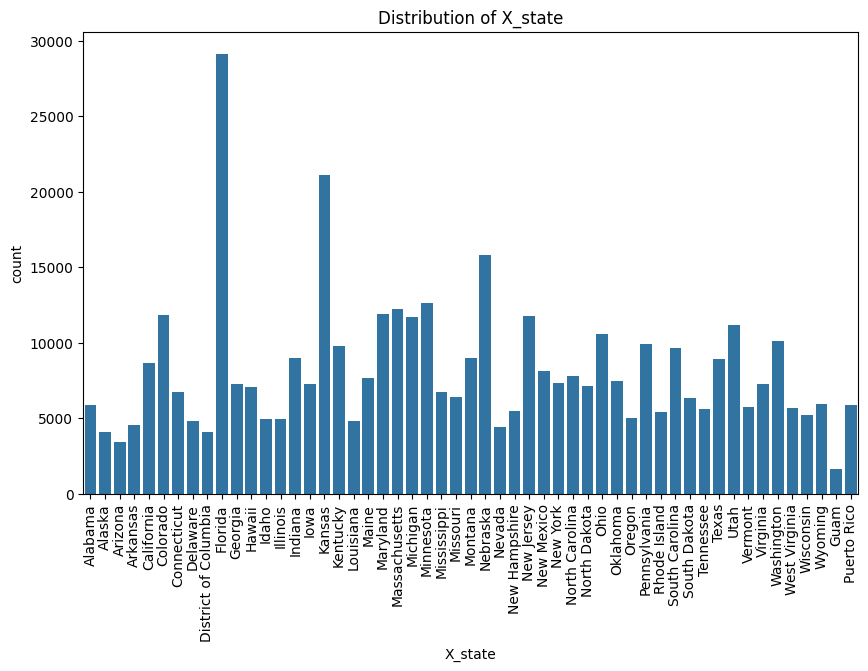

Value Proportions:
genhlth
Very good    32.66%
Good         30.55%
Excellent    17.12%
Fair         13.61%
Poor          5.67%
unknown       0.39%
Name: proportion, dtype: object


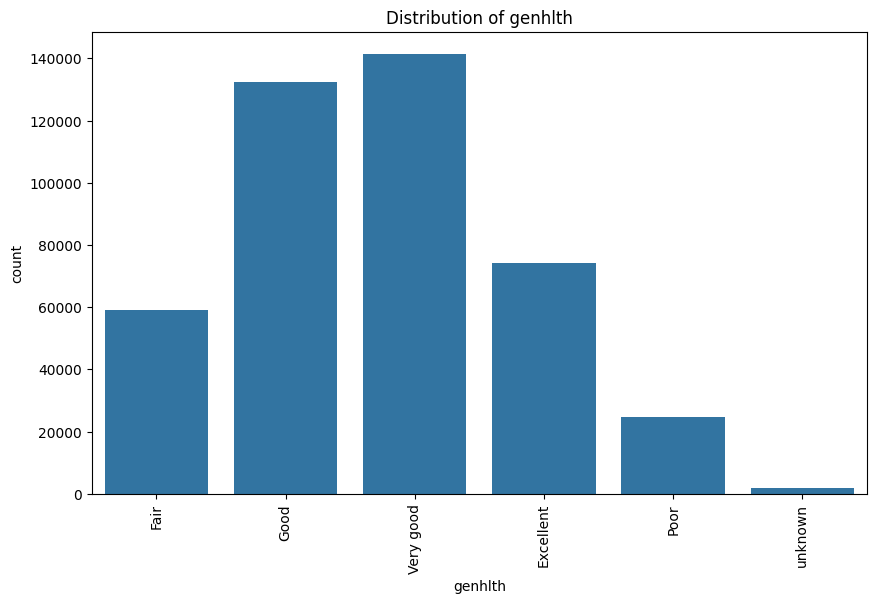

Summary Statistics:
count    433221.000000
mean          4.380675
std           8.782991
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: physhlth, dtype: float64


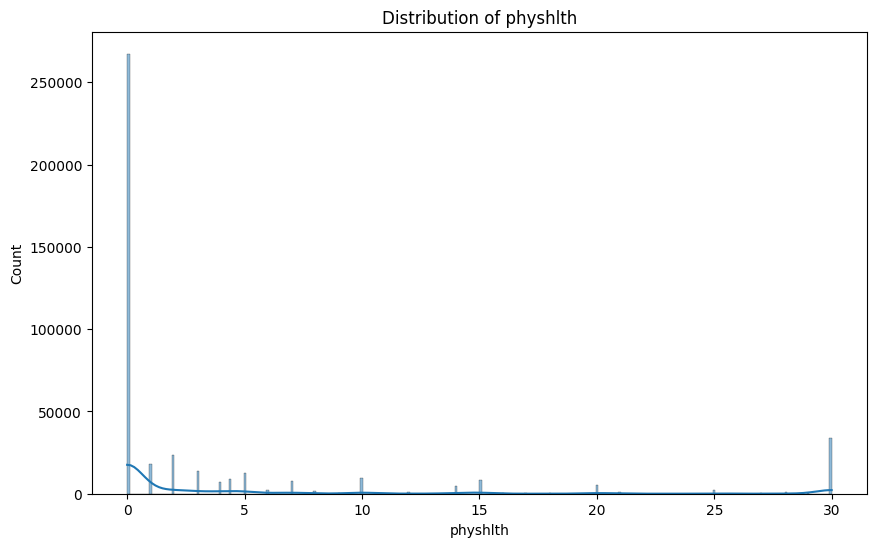

Summary Statistics:
count    433221.000000
mean          1.918325
std           4.213290
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          26.000000
Name: menthlth, dtype: float64


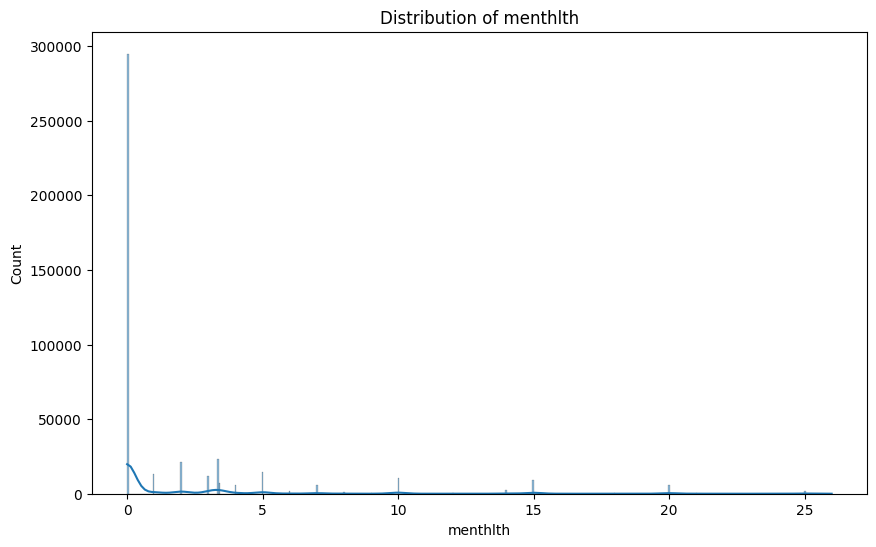

Value Proportions:
hlthpln1
Yes        88.94%
No         10.72%
unknown     0.35%
Name: proportion, dtype: object


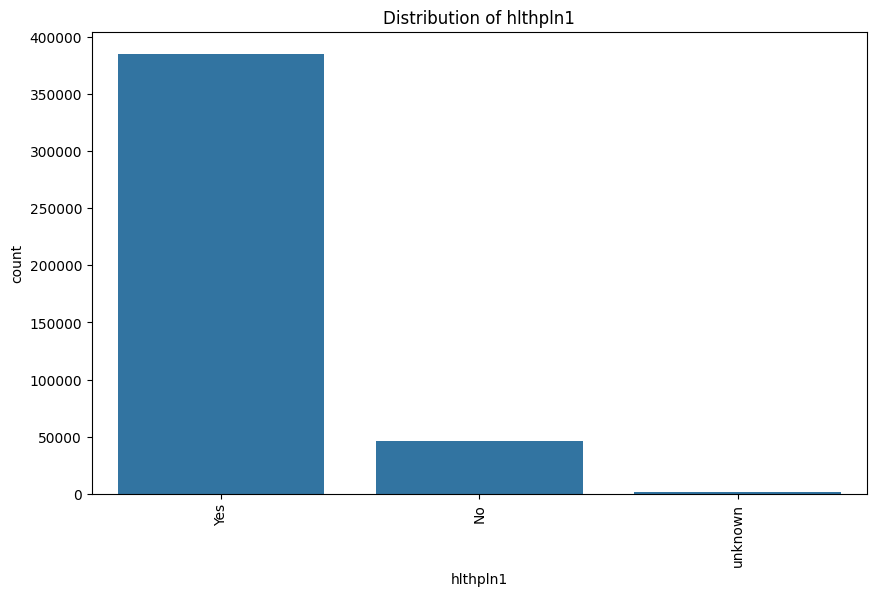

Value Proportions:
medcost
No         87.89%
Yes        11.88%
unknown     0.23%
Name: proportion, dtype: object


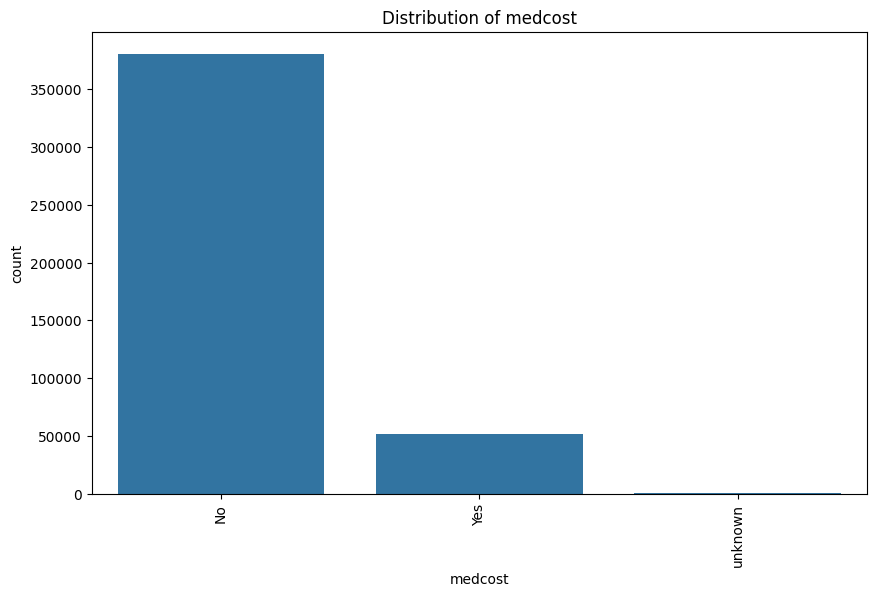

Summary Statistics:
count    433221.000000
mean          7.001935
std           1.258384
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: sleptim1, dtype: float64


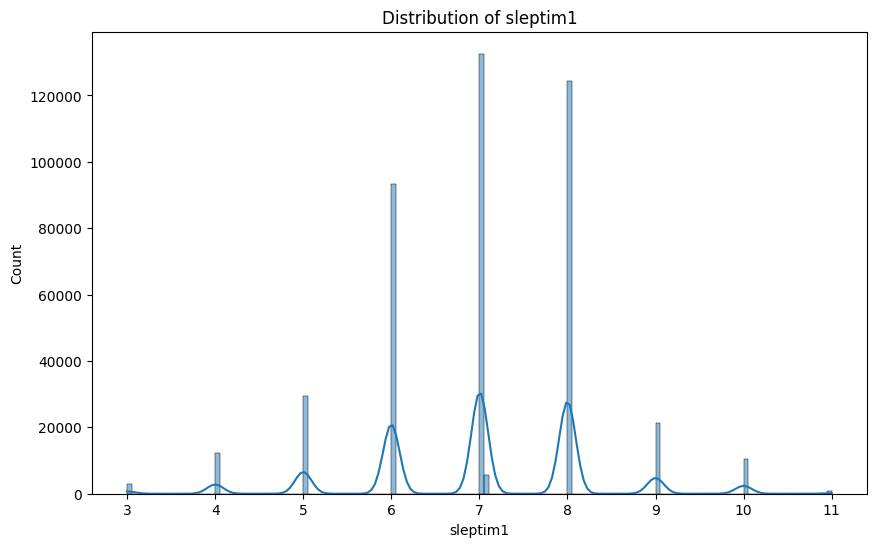

Value Proportions:
bphigh4
No                                            56.63%
Yes                                           41.28%
Told borderline or pre-hypertensive            1.07%
Yes, but female told only during pregnancy     0.75%
unknown                                        0.27%
Name: proportion, dtype: object


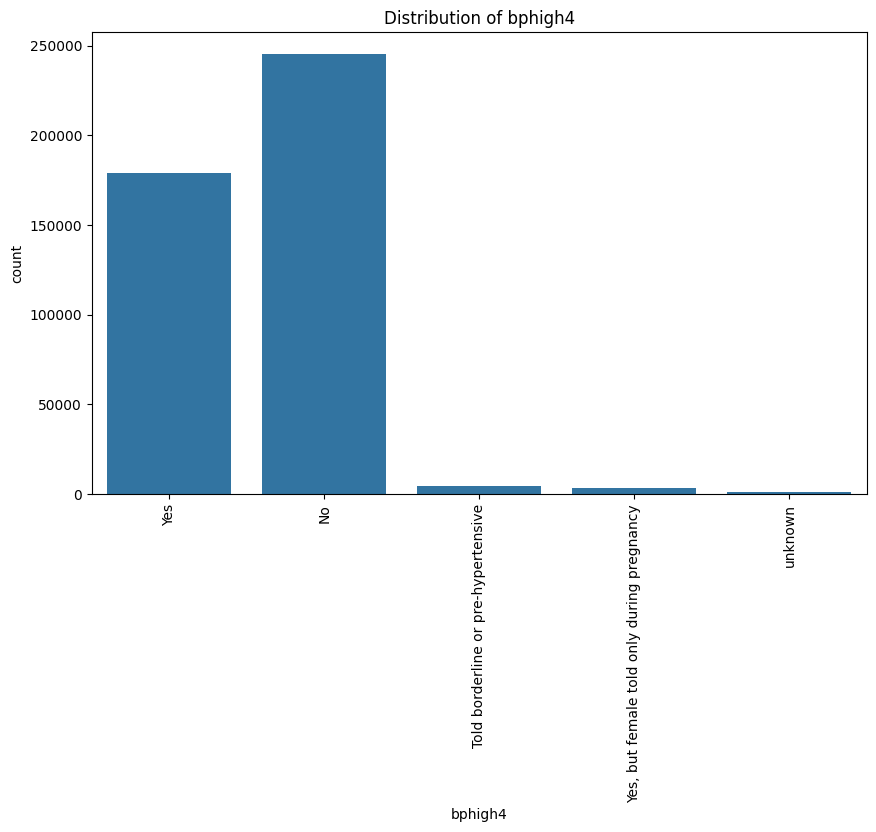

Value Proportions:
bloodcho
Yes        87.07%
No         11.18%
unknown     1.75%
Name: proportion, dtype: object


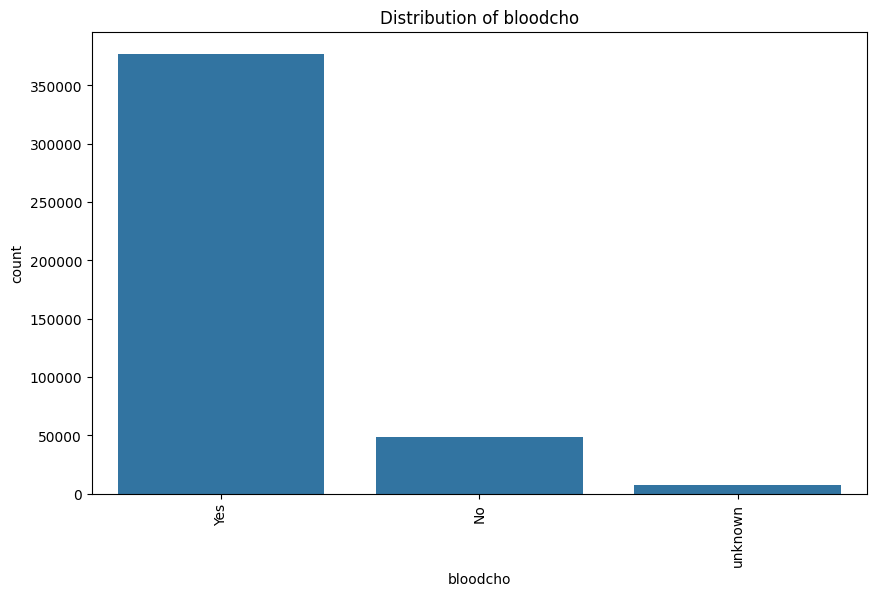

Value Proportions:
cvdinfr4
No         93.43%
Yes         6.07%
unknown     0.50%
Name: proportion, dtype: object


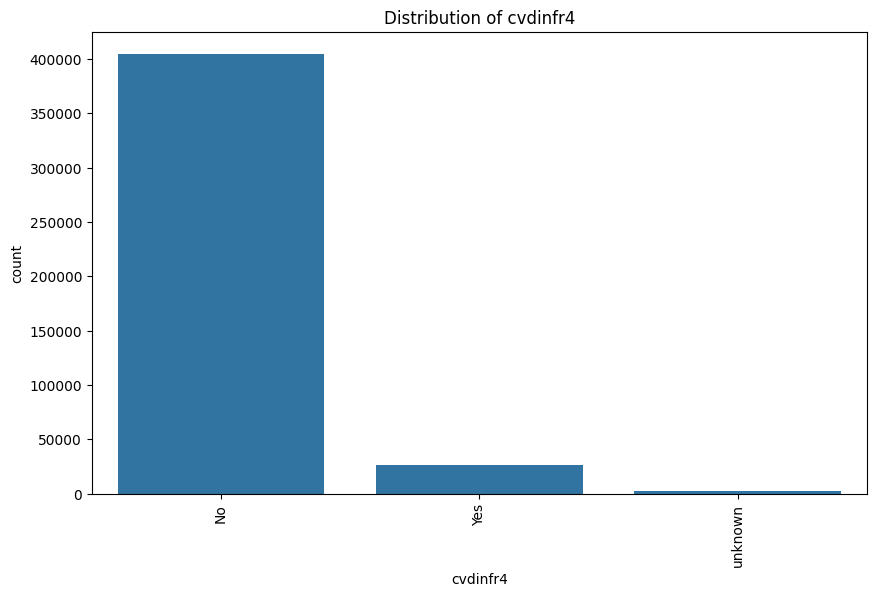

Value Proportions:
asthma3
No         85.97%
Yes        13.72%
unknown     0.31%
Name: proportion, dtype: object


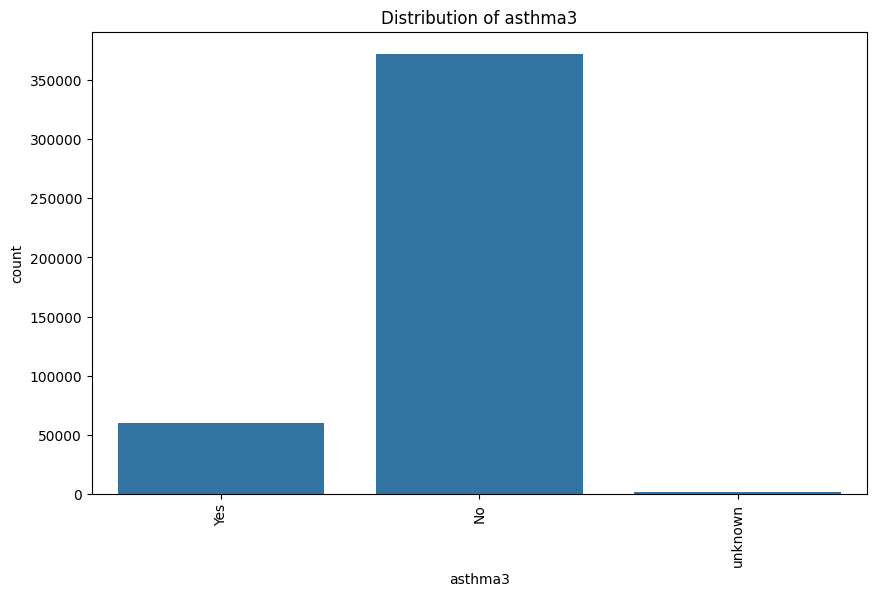

Value Proportions:
diabete3
No                                            84.14%
Yes                                           12.96%
No, pre-diabetes or borderline diabetes        1.81%
Yes, but female told only during pregnancy     0.94%
unknown                                        0.16%
Name: proportion, dtype: object


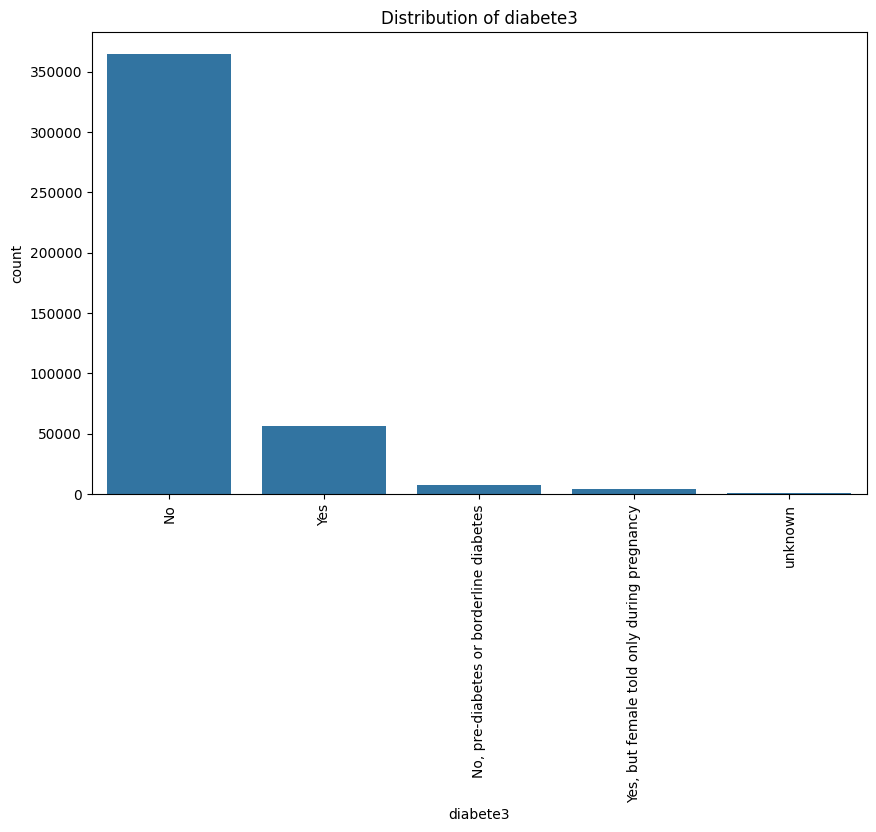

Value Proportions:
veteran3
No         87.34%
Yes        12.58%
unknown     0.08%
Name: proportion, dtype: object


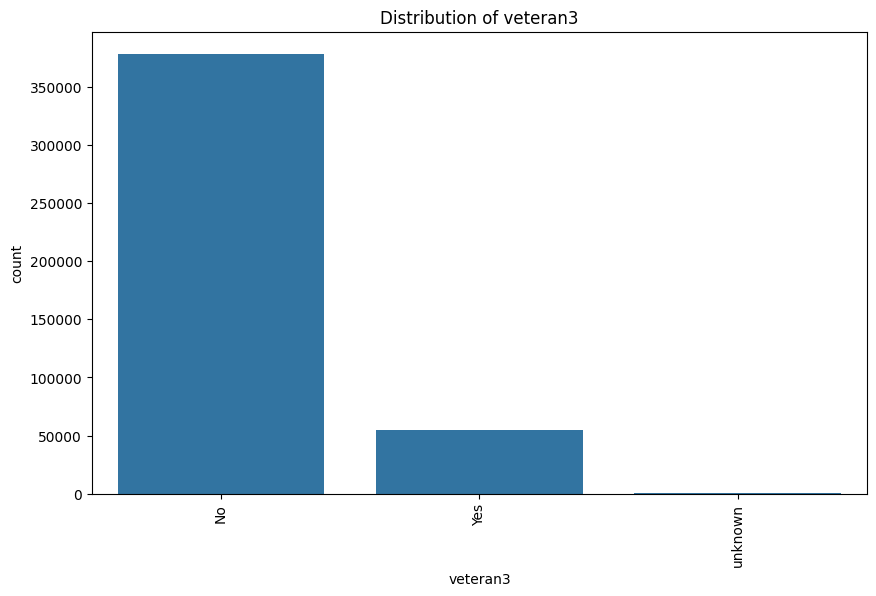

Value Proportions:
marital
Married                            52.09%
Divorced                           14.49%
Never married                      14.47%
Widowed                            13.74%
A member of an unmarried couple     2.59%
Separated                           2.11%
unknown                             0.51%
Name: proportion, dtype: object


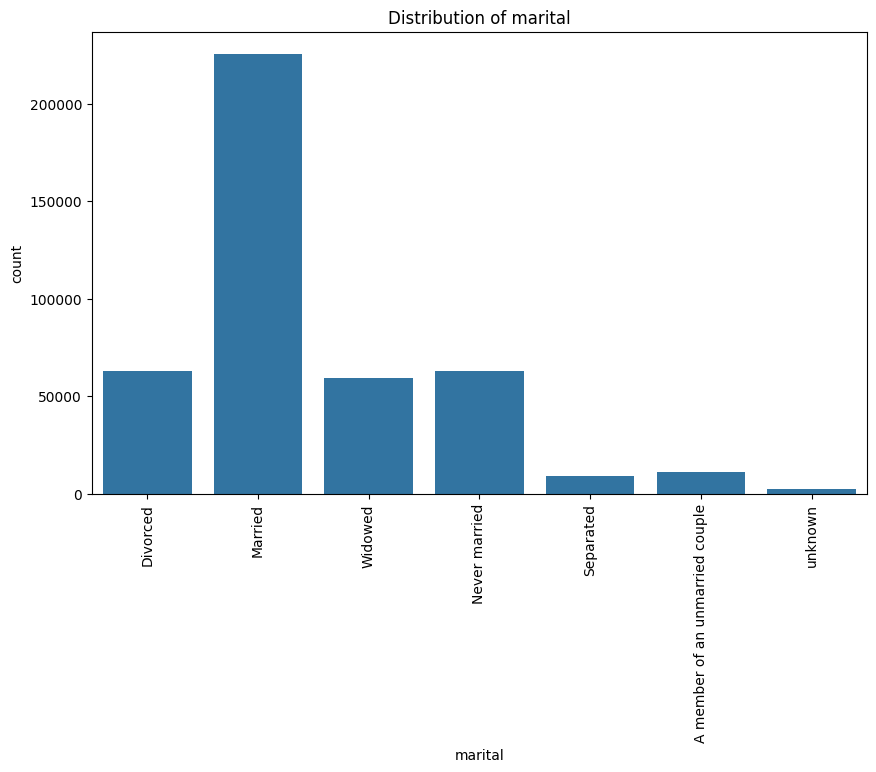

Summary Statistics:
count    433221.000000
mean          0.417670
std           0.808992
min           0.000000
25%           0.000000
50%           0.000000
75%           0.498836
max           3.000000
Name: children, dtype: float64


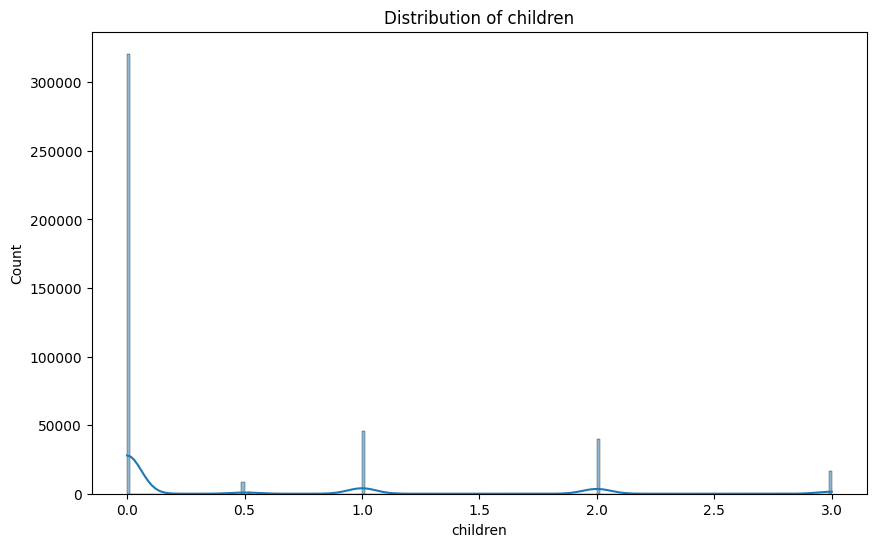

Value Proportions:
educa
College 4 years or more (College graduate)                      35.13%
Grade 12 or GED (High school graduate)                          28.76%
College 1 year to 3 years (Some college or technical school)    27.57%
Grades 9 though 11 (Some high school)                            5.55%
Grades 1 through 8 (Elementary)                                  2.63%
unknown                                                          0.24%
Never attended school or only kindergarten                       0.12%
Name: proportion, dtype: object


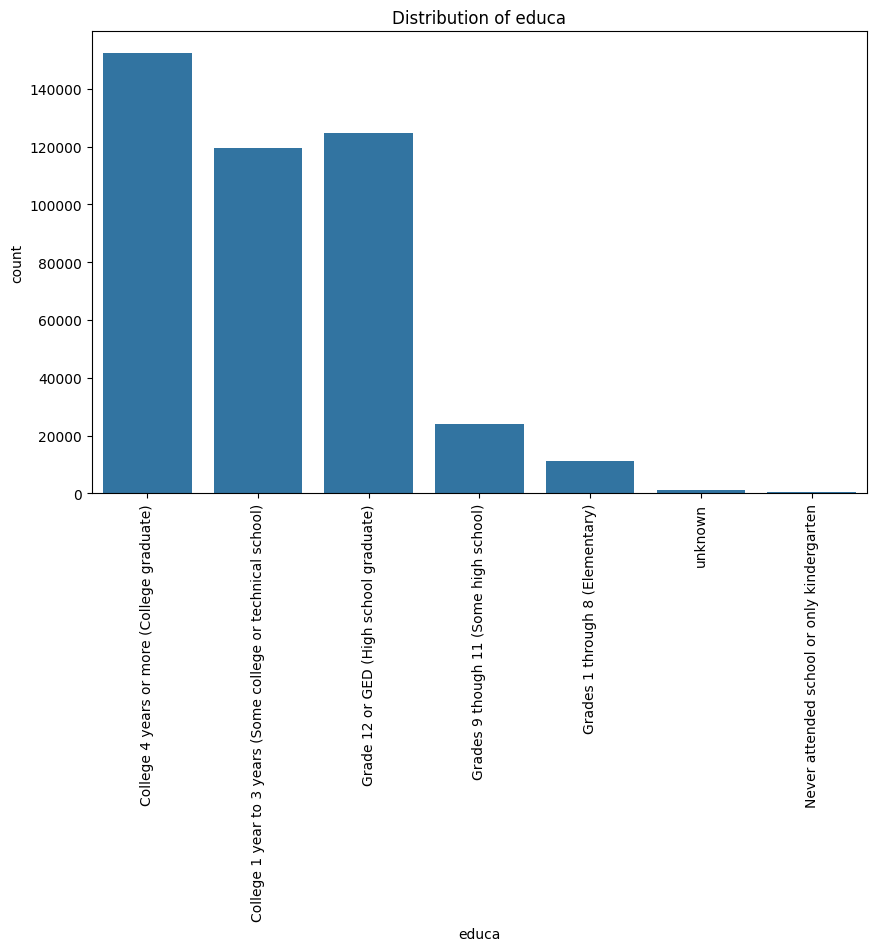

Value Proportions:
employ1
Employed for wages                  40.65%
Retired                             29.07%
Self-employed                        8.14%
Unable to work                       7.66%
A homemaker                          6.48%
Out of work for 1 year or more       2.80%
Out of work for less than 1 year     2.40%
A student                            2.39%
unknown                              0.42%
Name: proportion, dtype: object


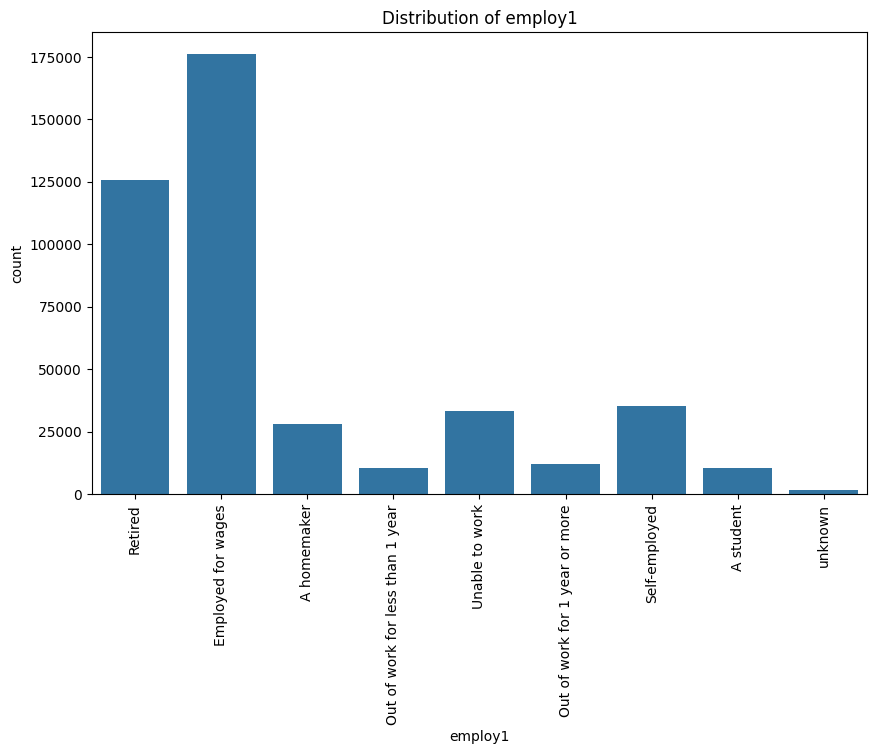

Value Proportions:
income2
$75,000 or more      24.14%
unknown              13.59%
Less than $75,000    13.57%
Less than $50,000    12.71%
Less than $35,000    10.00%
Less than $25,000     8.46%
Less than $20,000     7.03%
Less than $15,000     5.43%
Less than $10,000     5.05%
Name: proportion, dtype: object


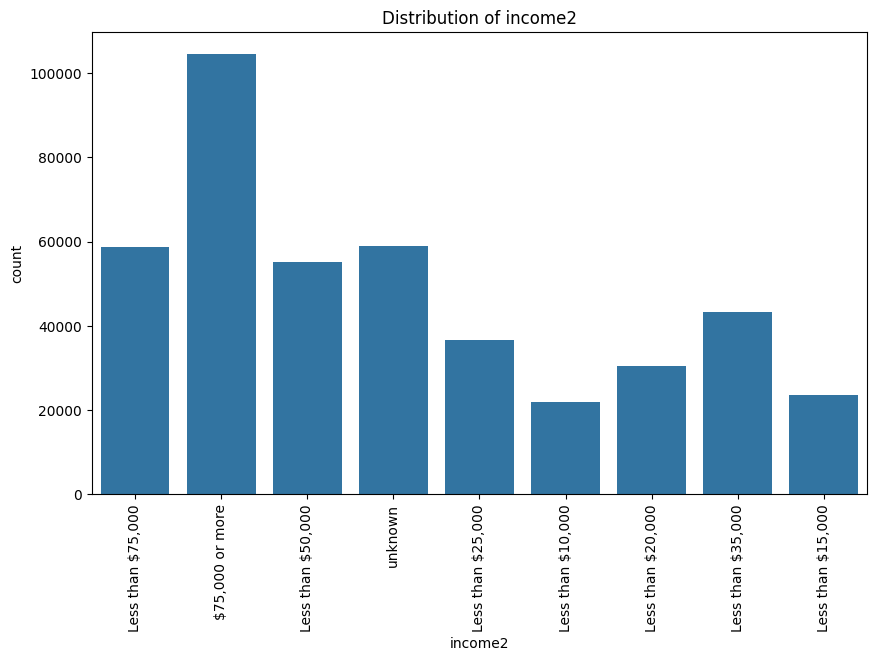

Summary Statistics:
count    433221.000000
mean        177.476837
std          43.763848
min           7.000000
25%         145.000000
50%         174.000000
75%         200.000000
max         693.000000
Name: weight2, dtype: float64


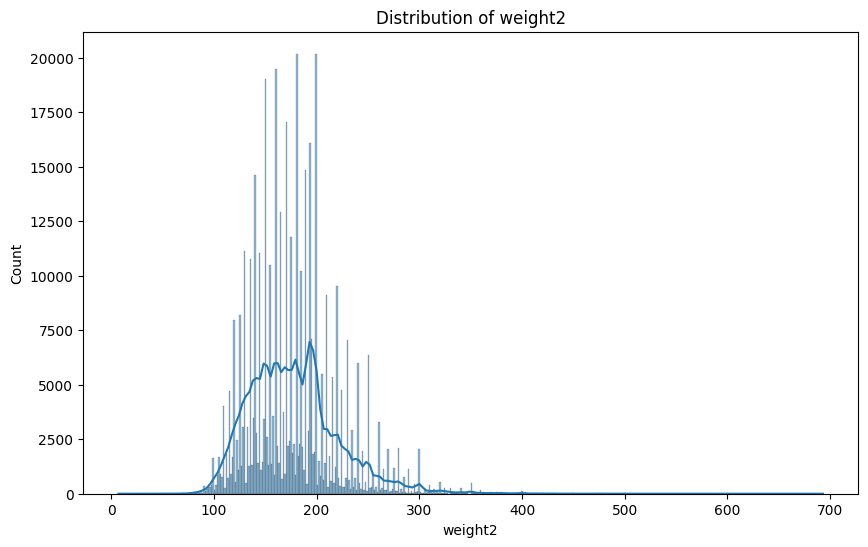

Summary Statistics:
count    433221.000000
mean        517.743090
std          36.601235
min           3.000000
25%         504.000000
50%         506.000000
75%         510.000000
max         803.000000
Name: height3, dtype: float64


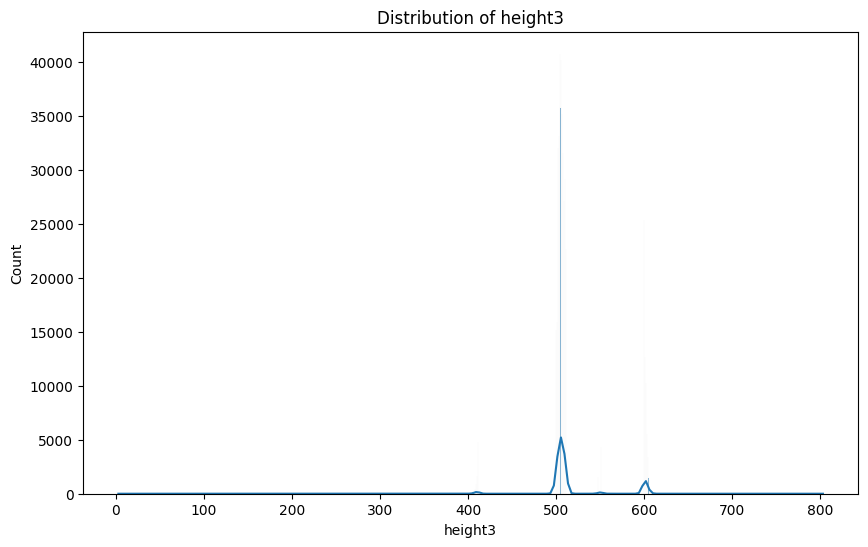

Value Proportions:
sex
Female     59.55%
Male       40.45%
unknown     0.00%
Name: proportion, dtype: object


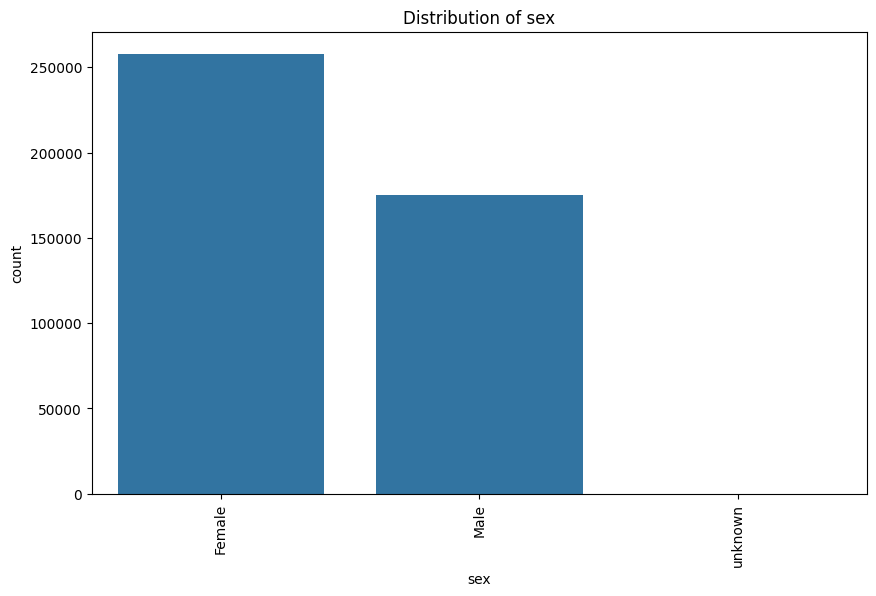

Value Proportions:
pregnant
unknown    84.96%
No         14.45%
Yes         0.59%
Name: proportion, dtype: object


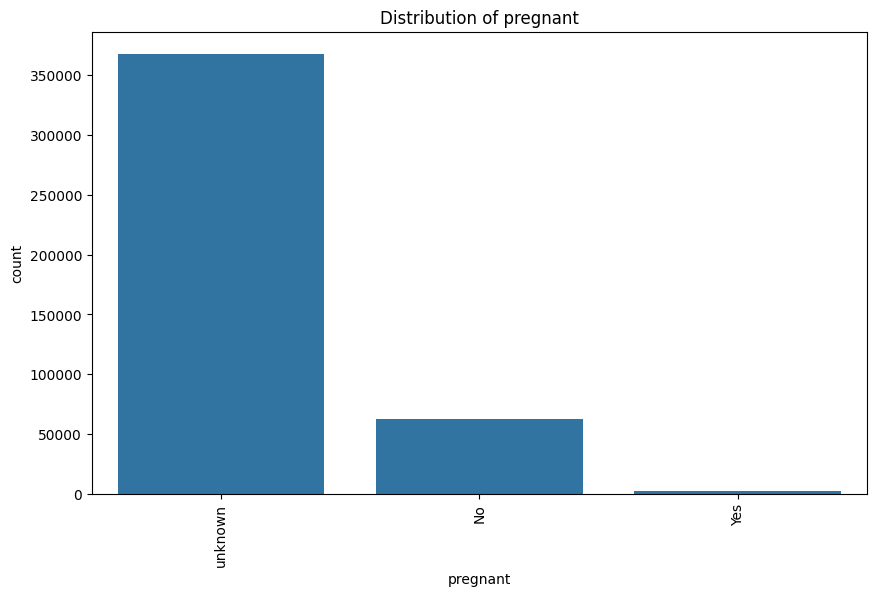

Value Proportions:
internet
Yes        75.61%
No         24.14%
unknown     0.24%
Name: proportion, dtype: object


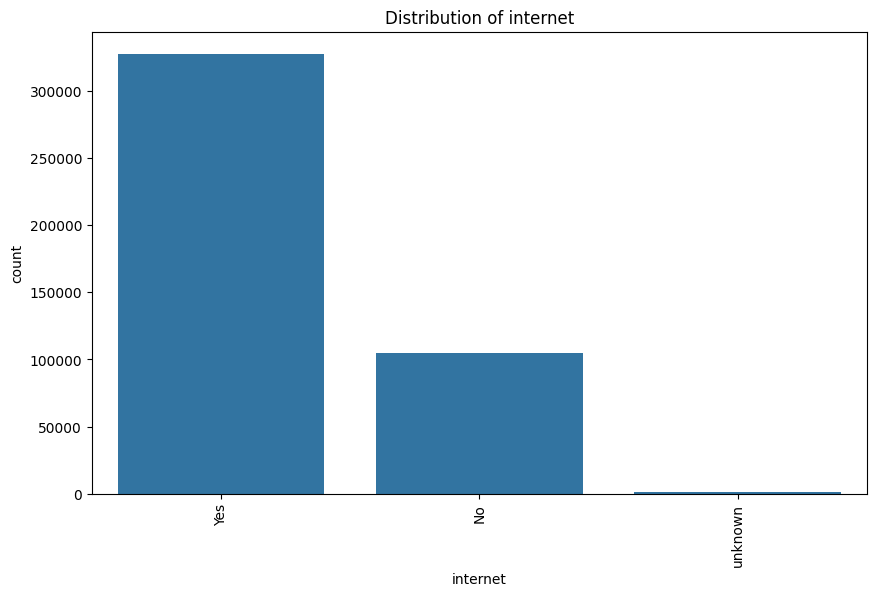

Value Proportions:
blind
No         94.27%
Yes         5.43%
unknown     0.30%
Name: proportion, dtype: object


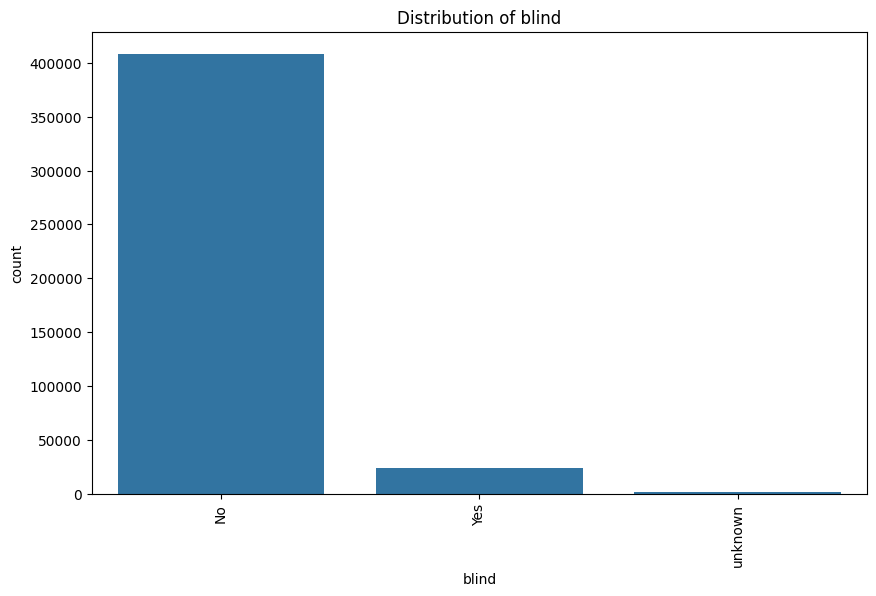

Value Proportions:
diffwalk
No         81.32%
Yes        18.29%
unknown     0.39%
Name: proportion, dtype: object


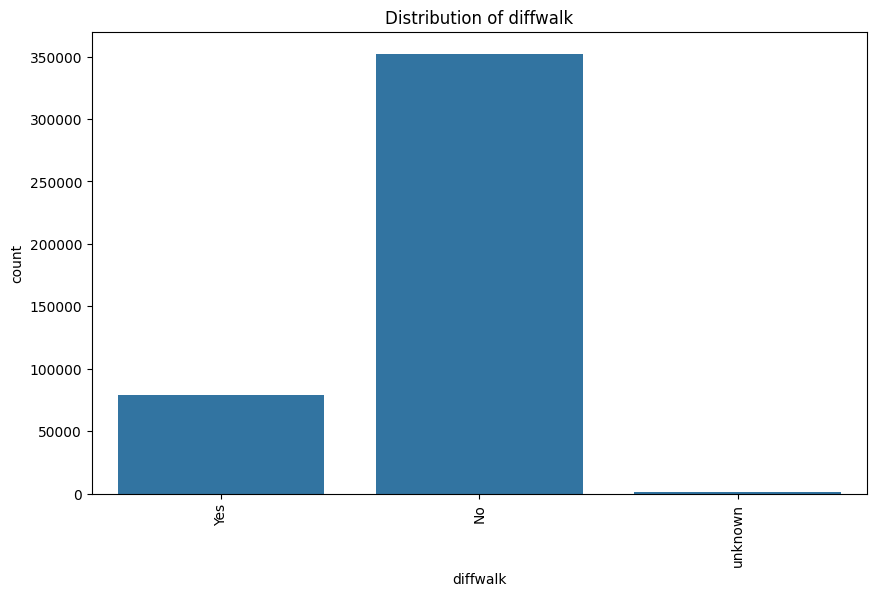

Value Proportions:
smoke100
No         54.42%
Yes        45.08%
unknown     0.50%
Name: proportion, dtype: object


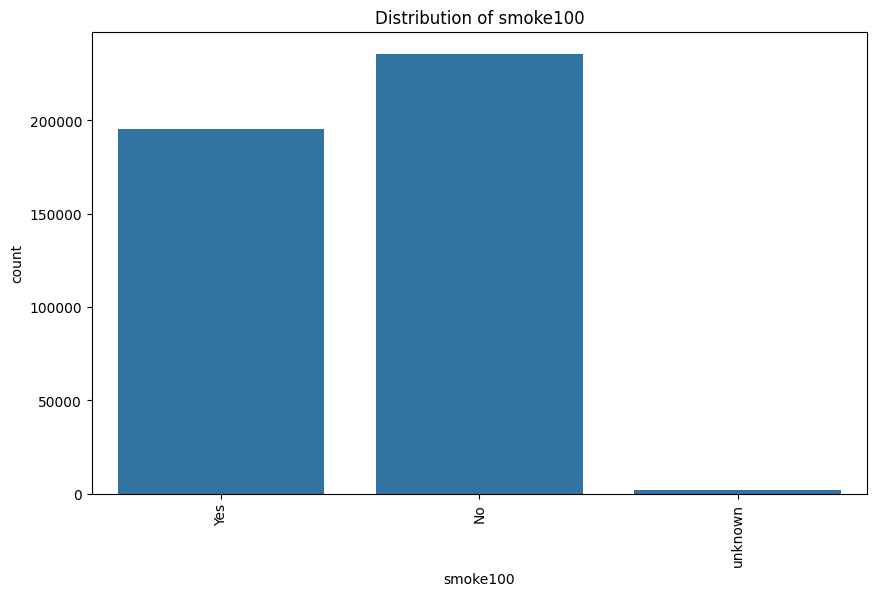

Value Proportions:
drnkany5
Yes        49.88%
No         49.12%
unknown     1.00%
Name: proportion, dtype: object


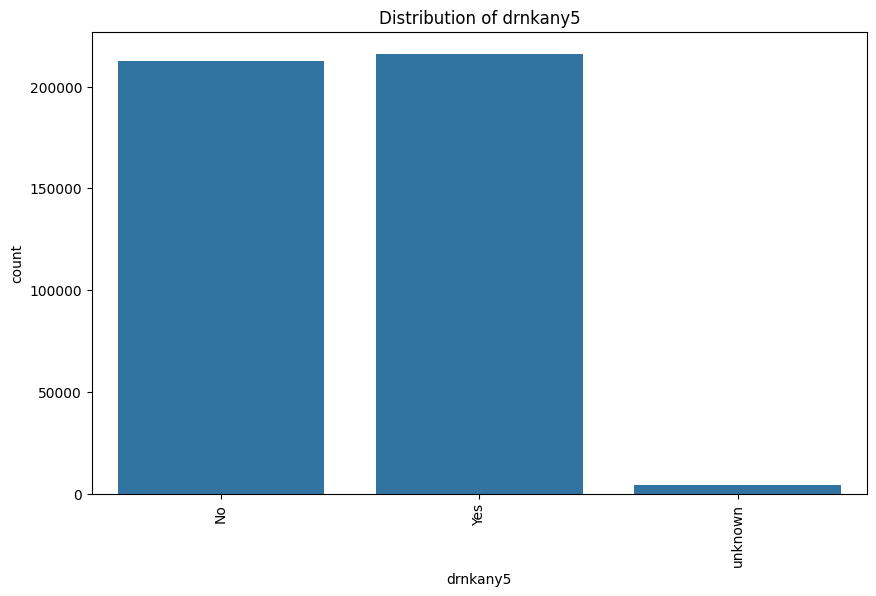

In [19]:
# Define the columns to be used for stratified sampling
# This is based on importance of the columns in order to maintain a wide demographic across the sample
async def main(df,columns_for_stratification,categorical_columns):
  tasks = []
  for col in columns_for_stratification:
    if col in categorical_columns:
      tasks.append(eda_categorical(df, col))
    else:
      tasks.append(eda_numerical(df, col))


  # Run tasks
  await asyncio.gather(*tasks)

# Run the main function
await main(df, columns_of_interest,categorical_columns)

<a id='section3'></a>

----
# Stratified Sampling - Using KMeans



Stratified sampling is a method of sampling from a population, which can be used when it's important to represent subgroups within that population. 
In this technique, the population is divided into distinct subgroups or strata that are homogeneous in some way that is relevant to the research. 
Each subgroup is then sampled as an independent sub-population, out of which individual elements can be randomly selected.

Using K-Means to stratify a sample is interesting due to the following 3 reasons: 

1. Discovery of natural groupings - Helps us identify natural groupings based on the inherent structures and patterns present. 
2. Data with High Dimensionality - K-Means allows us to reduce the high-dimensional data into a manageable number of clusters. 
3. Optimisation of Resource Allocation

In [20]:
# * Categorical Columns which are of interest to encode the labels
intersection = np.intersect1d(categorical_columns, columns_of_interest)

In [30]:
# Encode all categorical columns
# ? - Create a dictionary to store mappings between original values and encoded labels
label_mappings = {}
df_clean_encoded = df_clean.copy()
# ? - Apply label encoding to each categorical column
for col in intersection:
    label_encoder = LabelEncoder()
    df_clean_encoded[col] = label_encoder.fit_transform(df_clean_encoded[col]).copy()
    label_mappings[col] = {label: encoded_label for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


# Now all categorical columns are converted into numeric labels, and label mappings are stored in label_mappings
# Print out the label mappings
print("Label Mappings:")
for col, mapping in label_mappings.items():
    print(f"{col}: {mapping}")

Label Mappings:
X_state: {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Guam': 11, 'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16, 'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20, 'Maryland': 21, 'Massachusetts': 22, 'Michigan': 23, 'Minnesota': 24, 'Mississippi': 25, 'Missouri': 26, 'Montana': 27, 'Nebraska': 28, 'Nevada': 29, 'New Hampshire': 30, 'New Jersey': 31, 'New Mexico': 32, 'New York': 33, 'North Carolina': 34, 'North Dakota': 35, 'Ohio': 36, 'Oklahoma': 37, 'Oregon': 38, 'Pennsylvania': 39, 'Puerto Rico': 40, 'Rhode Island': 41, 'South Carolina': 42, 'South Dakota': 43, 'Tennessee': 44, 'Texas': 45, 'Utah': 46, 'Vermont': 47, 'Virginia': 48, 'Washington': 49, 'West Virginia': 50, 'Wisconsin': 51, 'Wyoming': 52}
asthma3: {'No': 0, 'Yes': 1, 'unknown': 2}
blind: {'No': 0, 'Yes': 1, 'unknown': 2}
bloodcho: {'No': 0,

In [31]:
# Perform K-means clustering to create K clusters based on the columns of interest
K = 6
kmeans = KMeans(n_clusters=K, random_state=42)  # Adjust the number of clusters as needed
df_clean_encoded['cluster'] = kmeans.fit_predict(df_clean_encoded[columns_of_interest])

# Initialize an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Define the number of samples to take from each cluster - MODIFY THIS TO INCREASE OR DECREASE THE NUMBER OF TOTAL SAMPLES
samples_per_cluster = 3000

# Take random samples from each cluster
for cluster_id in range(K):  # Assuming you have 10 clusters
    # Select data points belonging to the current cluster
    cluster_data = df_clean_encoded[df_clean_encoded['cluster'] == cluster_id]

    # Take a random sample from the cluster
    if len(cluster_data) > samples_per_cluster:
        cluster_sample = cluster_data.sample(n=samples_per_cluster, random_state=42)
    else:
        cluster_sample = cluster_data

    # Append the cluster sample to the overall sampled data
    sampled_data = pd.concat([sampled_data, cluster_sample])

# Remove the 'cluster' column as it's no longer needed
sampled_data.drop(columns=['cluster'], inplace=True)

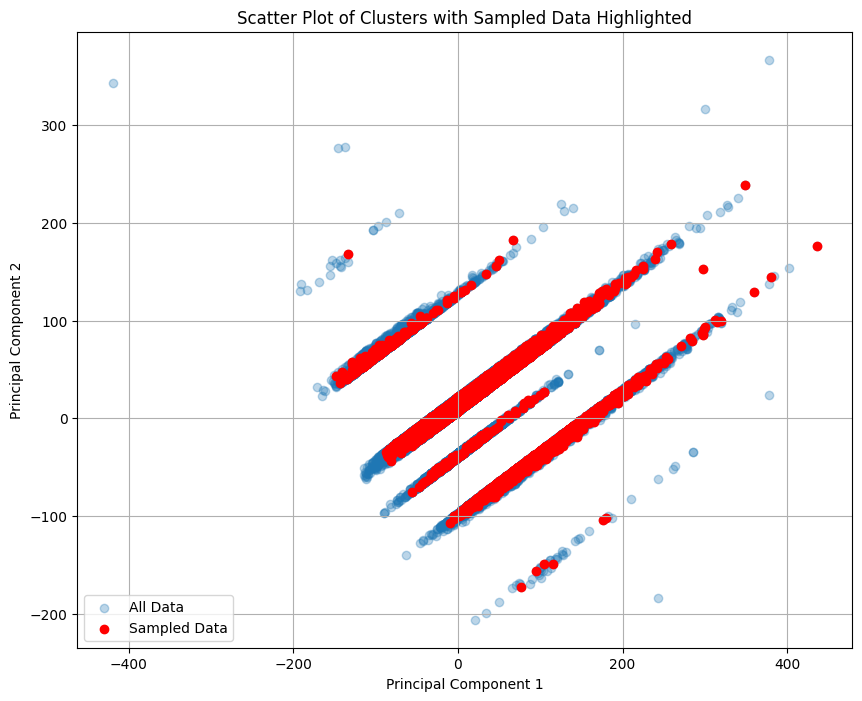

In [32]:
# Perform PCA decomposition with 2 principal components
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_clean_encoded[columns_of_interest])

# Scatter plot for all data points
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3, label='All Data')

# Scatter plot for sampled data points (highlighted)
sampled_pca_result = pca.transform(sampled_data[columns_of_interest])
plt.scatter(sampled_pca_result[:, 0], sampled_pca_result[:, 1], color='red', label='Sampled Data')

plt.title('Scatter Plot of Clusters with Sampled Data Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


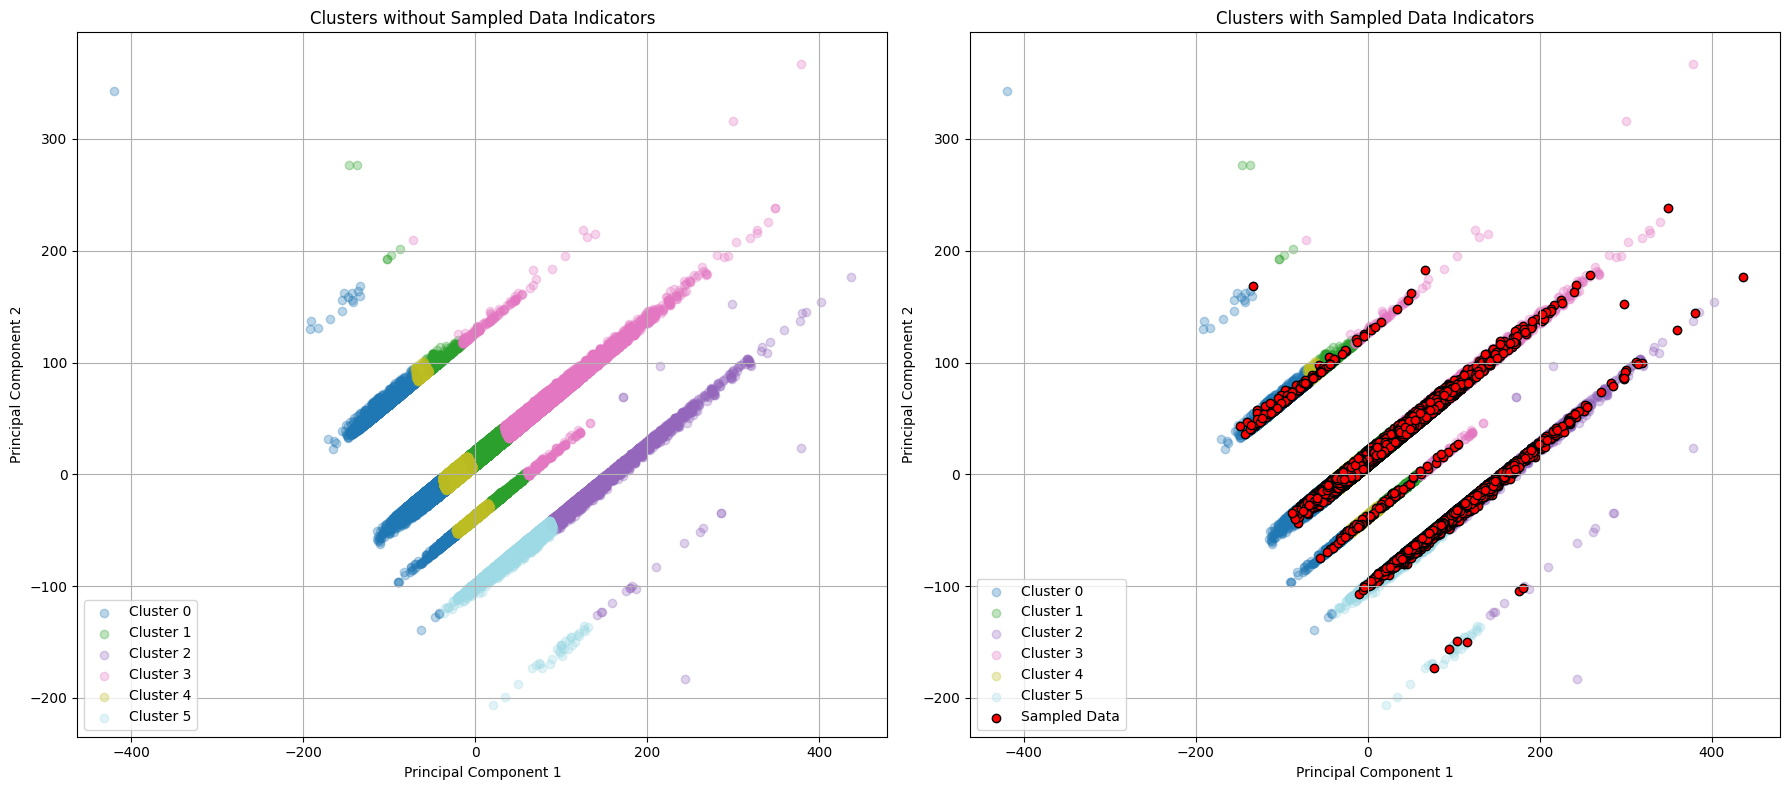

In [33]:
# Assign a color to each cluster from a distinguishable palette
colors = matplotlib.colormaps.get_cmap('tab20')(np.linspace(0,1,K))
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Scatter plot for all data points with clusters (without sampled data)
for cluster_id in range(K):  # Assuming you have 20 clusters
    cluster_indices = np.where(df_clean_encoded['cluster'] == cluster_id)[0]
    axs[0].scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1],
                   alpha=0.3, color=colors[cluster_id], label=f'Cluster {cluster_id}')

axs[0].set_title('Clusters without Sampled Data Indicators')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()
axs[0].grid(True)

# Scatter plot for all data points with clusters (with sampled data)
for cluster_id in range(K):  # Assuming you have 20 clusters
    cluster_indices = np.where(df_clean_encoded['cluster'] == cluster_id)[0]
    axs[1].scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1],
                   alpha=0.3, color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Scatter plot for sampled data points (highlighted)
# We use 'label='Sampled Data'' to include it in the legend
axs[1].scatter(sampled_pca_result[:, 0], sampled_pca_result[:, 1], color='red', edgecolor='black', label='Sampled Data')

axs[1].set_title('Clusters with Sampled Data Indicators')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

-----
# Results <a id='section4'></a>

In [34]:
print("The sampling has a total of", sampled_data.shape[0],"rows. This number can be increased if needed, increasing the total number of samples per cluster.")

The sampling has a total of 18000 rows. This number can be increased if needed, increasing the total number of samples per cluster.


## Decoder of the sampled data

In [39]:
# To decode the encoded DataFrame back to its original values
sampled_data_decoded = sampled_data.copy()
for col in intersection:
    if col in label_mappings:
        # Replace encoded labels with original values
        sampled_data_decoded[col] = sampled_data[col].map(label_mappings[col])
    else: 
        print(f'Warning: No label mappings found for column: {col}')

X_state
asthma3
blind
bloodcho
bphigh4
cvdinfr4
diabete3
diffwalk
drnkany5
educa
employ1
genhlth
hlthpln1
income2
internet
marital
medcost
pregnant
sex
smoke100
veteran3


In [36]:
# Reset Index of the Sampled Data
final_sample = sampled_data_decoded.reset_index(drop=True)

We have:

- **df**: The original dataset
- **df_clean**: The original dataset without outliers and unfinished interviews
- **df_clean_encoded**: The clean df with encoded categories
- **label_mappings**: The mappings for the encoded categories
- **sampled_data**: The sampled data from each cluster, with all encoded values
- **sampled_data_decoded**: The sampled data from each cluster, decoded to the original values
- **final_sample**: The sampled data with reset index to continue the project

In [37]:
final_sample

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,...,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
0,NaN,July,9132013.0,September,13.0,2013.0,Completed interview,2.013008e+09,2.013008e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,Yes,36.0
1,NaN,August,8082013.0,August,8.0,2013.0,Completed interview,2.013003e+09,2.013003e+09,Yes,...,Did not meet both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and no limited work,Told have arthritis and social activities not ...,Always or almost always wear seat belt,Don't always wear seat belt,Yes,No,No,70.0
2,NaN,December,12022013.0,December,2.0,2013.0,Completed interview,2.013007e+09,2.013007e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,Yes,62.0
3,NaN,February,2112013.0,February,11.0,2013.0,Completed interview,2.013000e+09,2.013000e+09,Yes,...,Met both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and no limited work,Told have arthritis and social activities not ...,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,No,60.0
4,NaN,March,3212013.0,March,21.0,2013.0,Completed interview,2.013001e+09,2.013001e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,NaN,January,2062013.0,February,6.0,2013.0,Completed interview,2.013002e+09,2.013002e+09,Yes,...,Did not meet both guidelines,Told have arthritis and no limited usual activ...,Told have arthritis and have limited work,Told have arthritis and social activities limi...,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,No,52.0
17996,NaN,April,4052013.0,April,5.0,2013.0,Completed interview,2.013008e+09,2.013008e+09,Yes,...,Met both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Don't always wear seat belt,unknown,unknown,Yes,21.0
17997,NaN,February,2152013.0,February,15.0,2013.0,Completed interview,2.013000e+09,2.013000e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,unknown,unknown,Yes,51.0
17998,NaN,January,1242013.0,January,24.0,2013.0,Completed interview,2.013002e+09,2.013002e+09,Yes,...,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,Yes,No,71.0


In [38]:
final_sample.to_csv('final_sample.csv', index=False)

----
# Answers to the questions: <a id='section5'></a>